In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0



# 1.1 Data Dictionary

    age: age in years
    sex: sex
        1 = male
        0 = female
    cp: chest pain type
        Value 0: typical angina
        Value 1: atypical angina
        Value 2: non-anginal pain
        Value 3: asymptomatic
    trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    chol: serum cholestoral in mg/dl
    fbs: (fasting blood sugar > 120 mg/dl)
        1 = true;
        0 = false
    restecg: resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    thalach: maximum heart rate achieved
    exang: exercise induced angina
        1 = yes
        0 = no
    oldpeak = ST depression induced by exercise relative to rest
    slope: the slope of the peak exercise ST segment
        Value 0: upsloping
        Value 1: flat
        Value 2: downsloping
    ca: number of major vessels (0-3) colored by flourosopy
    thal:
        0 = error (in the original dataset 0 maps to NaN's)
        1 = fixed defect
        2 = normal
        3 = reversable defect
    target (the lable):
        0 = no disease,
        1 = disease

Note on the target label:

Diagnosis of heart disease (angiographic disease status)
Value 0: < 50% diameter narrowing
Value 1: > 50% diameter narrowing

Notes from the discussion forum of the dataset:

    data #93, 159, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs.
    data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.

Action: Drop the faulty data! (7 data entry will be dropped)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.columns = data.columns.map(lambda x: x.replace(x[0], chr(ord(x[0]) - 32), 1))

In [7]:
data

,Age,Sex,Cp,Trtbps,Chol,Fbs,Restecg,Thalachh,Exng,Oldpeak,Slp,Caa,Thall,Output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
data.corr().T

,Age,Sex,Cp,Trtbps,Chol,Fbs,Restecg,Thalachh,Exng,Oldpeak,Slp,Caa,Thall,Output
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
Sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
Cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
Trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
Chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
Fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
Restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
Thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
Exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
Oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [9]:
data.head()

,Age,Sex,Cp,Trtbps,Chol,Fbs,Restecg,Thalachh,Exng,Oldpeak,Slp,Caa,Thall,Output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:


data = data.rename(
    columns = {'Cp':'chest_pain_type', 
               'Trtbps':'resting_blood_pressure', 
               'Chol': 'cholesterol',
               'Fbs': 'fasting_blood_sugar',
               'Restecg' : 'resting_electrocardiogram', 
               'Thalachh': 'max_heart_rate_achieved', 
               'Exng': 'exercise_induced_angina',
               'Oldpeak': 'st_depression', 
               'Slp': 'st_slope', 
               'Caa':'num_major_vessels', 
               'Thall': 'thalassemia'}, 
    errors="raise")

In [11]:
data['Sex'][data['Sex'] == 0] = 'female'
data['Sex'][data['Sex'] == 1] = 'male'

C:\Users\Joe\AppData\Local\Temp\ipykernel_18336\3614615449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'][data['Sex'] == 0] = 'female'


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        303 non-null    int64  
 1   Sex                        303 non-null    object 
 2   chest_pain_type            303 non-null    int64  
 3   resting_blood_pressure     303 non-null    int64  
 4   cholesterol                303 non-null    int64  
 5   fasting_blood_sugar        303 non-null    int64  
 6   resting_electrocardiogram  303 non-null    int64  
 7   max_heart_rate_achieved    303 non-null    int64  
 8   exercise_induced_angina    303 non-null    int64  
 9   st_depression              303 non-null    float64
 10  st_slope                   303 non-null    int64  
 11  num_major_vessels          303 non-null    int64  
 12  thalassemia                303 non-null    int64  
 13  Output                     303 non-null    int64  

In [13]:
data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 0] = 'normal'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'normal'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

C:\Users\Joe\AppData\Local\Temp\ipykernel_18336\2783578481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
C:\Users\Joe\AppData\Local\Temp\ipykernel_18336\2783578481.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
C:\Users\Joe\AppData\Local\Temp\ipykernel_18336\2783578481.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        303 non-null    int64  
 1   Sex                        303 non-null    object 
 2   chest_pain_type            303 non-null    object 
 3   resting_blood_pressure     303 non-null    int64  
 4   cholesterol                303 non-null    int64  
 5   fasting_blood_sugar        303 non-null    object 
 6   resting_electrocardiogram  303 non-null    object 
 7   max_heart_rate_achieved    303 non-null    int64  
 8   exercise_induced_angina    303 non-null    object 
 9   st_depression              303 non-null    float64
 10  st_slope                   303 non-null    object 
 11  num_major_vessels          303 non-null    int64  
 12  thalassemia                303 non-null    object 
 13  Output                     303 non-null    int64  

In [15]:
data.dtypes

Age                            int64
Sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
Output                         int64
dtype: object

In [16]:
data.head()

,Age,Sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,Output
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


In [17]:
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from scipy.stats import uniform

import warnings
warnings.filterwarnings('ignore')

In [18]:
number_var=['Age','resting_blood_pressure','cholesterol', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'Output']

In [19]:
number_var

['Age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression',
 'num_major_vessels',
 'Output']

In [20]:
data[number_var].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
max_heart_rate_achieved,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
st_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
num_major_vessels,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
Output,303.0,0.544554,0.498835,0.0,0.0,1.0,1.0,1.0


In [21]:
data[number_var].corr()

,Age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,Output
Age,1.000000,0.279351,0.213678,-0.398522,0.210013,0.276326,-0.225439
resting_blood_pressure,0.279351,1.000000,0.123174,-0.046698,0.193216,0.101389,-0.144931
cholesterol,0.213678,0.123174,1.000000,-0.009940,0.053952,0.070511,-0.085239
max_heart_rate_achieved,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.213177,0.421741
st_depression,0.210013,0.193216,0.053952,-0.344187,1.000000,0.222682,-0.430696
num_major_vessels,0.276326,0.101389,0.070511,-0.213177,0.222682,1.000000,-0.391724
Output,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,-0.391724,1.000000


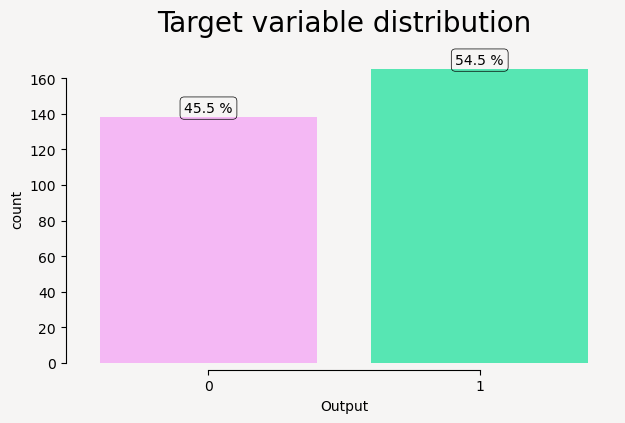

In [22]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 4),facecolor='#F6F5F4')
total = float(len(data))
ax = sns.countplot(x=data['Output'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

In [23]:
data['Output']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: Output, Length: 303, dtype: int64

In [24]:
data.corr()

,Age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,Output
Age,1.000000,0.279351,0.213678,-0.398522,0.210013,0.276326,-0.225439
resting_blood_pressure,0.279351,1.000000,0.123174,-0.046698,0.193216,0.101389,-0.144931
cholesterol,0.213678,0.123174,1.000000,-0.009940,0.053952,0.070511,-0.085239
max_heart_rate_achieved,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.213177,0.421741
st_depression,0.210013,0.193216,0.053952,-0.344187,1.000000,0.222682,-0.430696
num_major_vessels,0.276326,0.101389,0.070511,-0.213177,0.222682,1.000000,-0.391724
Output,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,-0.391724,1.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        303 non-null    int64  
 1   Sex                        303 non-null    object 
 2   chest_pain_type            303 non-null    object 
 3   resting_blood_pressure     303 non-null    int64  
 4   cholesterol                303 non-null    int64  
 5   fasting_blood_sugar        303 non-null    object 
 6   resting_electrocardiogram  303 non-null    object 
 7   max_heart_rate_achieved    303 non-null    int64  
 8   exercise_induced_angina    303 non-null    object 
 9   st_depression              303 non-null    float64
 10  st_slope                   303 non-null    object 
 11  num_major_vessels          303 non-null    int64  
 12  thalassemia                303 non-null    object 
 13  Output                     303 non-null    int64  

In [26]:
data[number_var].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   resting_blood_pressure   303 non-null    int64  
 2   cholesterol              303 non-null    int64  
 3   max_heart_rate_achieved  303 non-null    int64  
 4   st_depression            303 non-null    float64
 5   num_major_vessels        303 non-null    int64  
 6   Output                   303 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 16.7 KB


# Predictions

In [27]:
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [28]:
X=data[number_var[:-1]]
y=data['Output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [29]:
rf_classifier=RandomForestClassifier()
rf_classifier.fit(X_train, y_train,)

RandomForestClassifier()

In [30]:
X.shape

(303, 6)

In [31]:
y.shape

(303,)

In [32]:
y_test_pred=rf_classifier.predict(X_test)
y_test_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [33]:
X_test

,Age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
99,53,130,246,173,0.0,3
296,63,124,197,136,0.0,0
89,58,100,248,122,1.0,0
30,41,105,198,168,0.0,1
234,70,130,322,109,2.4,3
...,...,...,...,...,...,...
173,58,132,224,173,3.2,2
94,45,112,160,138,0.0,0
161,55,132,342,166,1.2,0
216,62,130,263,97,1.2,1


In [34]:
y_test

99     1
296    0
89     1
30     1
234    0
      ..
173    0
94     1
161    1
216    0
91     1
Name: Output, Length: 61, dtype: int64